<a href="https://colab.research.google.com/github/Paultsoi-1014/Yoga-Pose-Classification-Evaluation/blob/main/YOLOv5_Custom_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Training with YOLOv5

In this .ipynb file, we assemble a yoga pose training set and a custom YOLOv5 model to recognize and classify different yoga pose. In this project, we adopt godness and tree pose as a demonstration for the YOLO model

### Step 1: Cloning YOLOv5 model from Github and install all requirements 

In [ ]:
# Custom Training with YOLOv5
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12711, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 12711 (delta 54), reused 54 (delta 28), pack-reused 12618
Receiving objects: 100% (12711/12711), 12.61 MiB | 30.60 MiB/s, done.
Resolving deltas: 100% (8707/8707), done.
/content/yolov5
     |████████████████████████████████| 596 kB 4.0 MB/s 
     |████████████████████████████████| 145 kB 2.7 MB/s 
     |████████████████████████████████| 178 kB 24.1 MB/s 
     |████████████████████████████████| 1.1 MB 64.6 MB/s 
     |████████████████████████████████| 67 kB 7.0 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 138 kB 69.9 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


## Step 2: Prepare labelled yoga pose datasets through using Roboflow
* Dataset is obtained from Kaggle 
[link text](https://www.kaggle.com/datasets/niharika41298/yoga-poses-dataset)
* Raw images are uploaded and labelled

## Version
![](https://drive.google.com/uc?export=view&id=1Ha59_wSVlKWAb7_QyCdbJNFEdvkBsRwq)


In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="YOUR ROBOFLOW KEY") # Modified to hide the roboflow key
project = rf.workspace("yolo-pgi6p").project("yolo_yoga")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/yolo_yoga-3 in yolov5pytorch:: 100%|██████████| 774/774 [00:00<00:00, 1308.76it/s]


## Step 3: Training the custom YOLOv5 model
* img: Input image size
* batch: Batch size
* epochs: The number of training epoches
* data: The location of the dataset
* weight: The weight that used for transfer learning 
* cache: For faster learning purpose

In [ ]:
# Start training
!python train.py --img 416 --batch 16 --epochs 500 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/yolo_yoga-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-391-g7639e4c Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0

In [ ]:
# Tensorboard
%load_ext tensorboard
%tensorboard --logdir runs

## Plotting from the Tensorboard


#### Metrics
![](https://drive.google.com/uc?export=view&id=1AsHgTv-QlN_sua80oVmbSpwFP38Ey8_K)

#### Train
![](https://drive.google.com/uc?export=view&id=15DJCp1k3WGoUdu0WEArm7_NSgRr9j2iv)

## Step 4: Training result

In [ ]:
# Start predicting the result
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/yolo_yoga-3/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-391-g7639e4c Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/26 /content/datasets/yolo_yoga-3/test/images/00000075_jpg.rf.3e7cdce5133ae0628f6366221aff5a8c.jpg: 416x416 1 tree, Done. (0.008s)
image 2/26 /content/datasets/yolo_yoga-3/test/images/00000079_jpg.rf.7cd3637dda0b7e2b7ce121d059e635ea.jpg: 416x416 2 godnesss, Done. (0.008s)
image 3/26 /content/datasets/yolo_yoga-3/test/images/000000

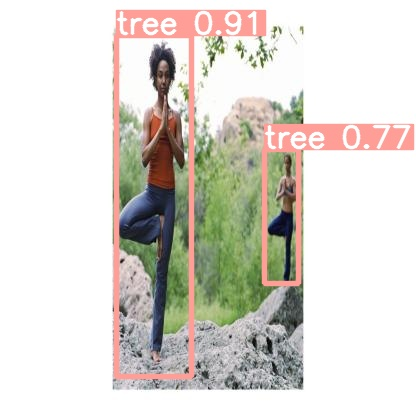

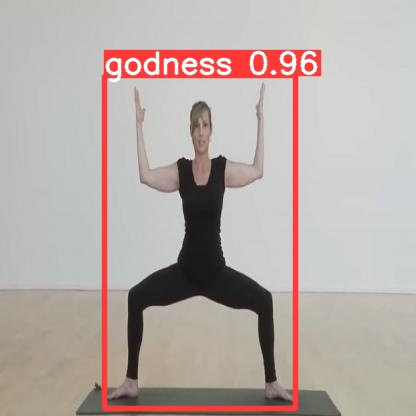

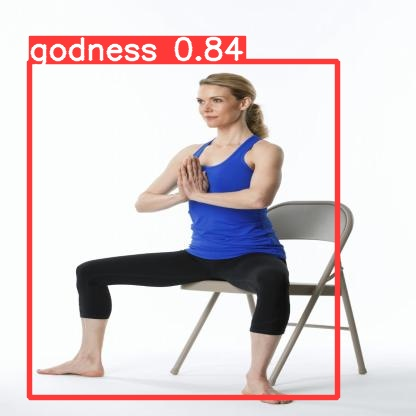

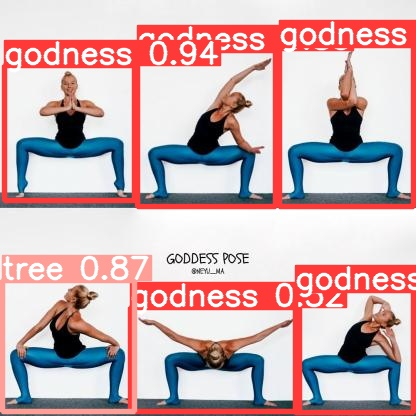

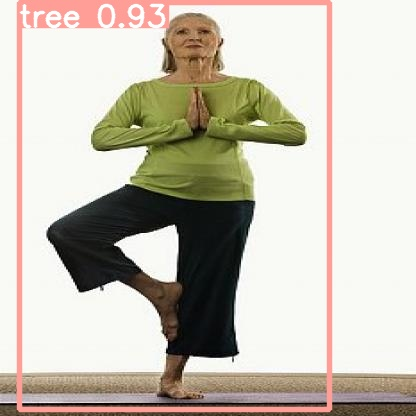

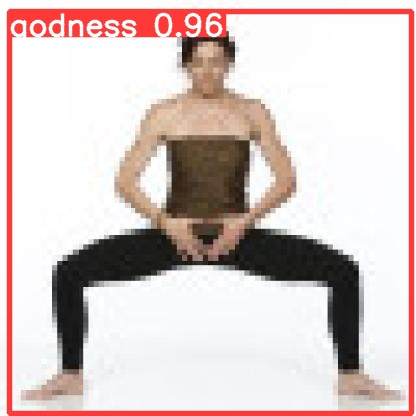

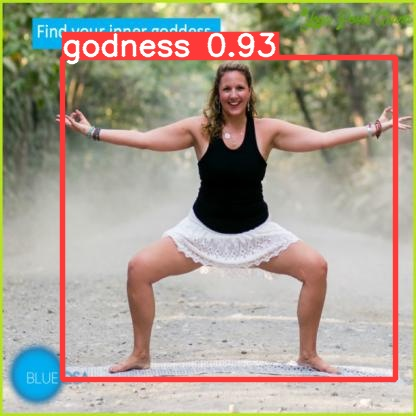

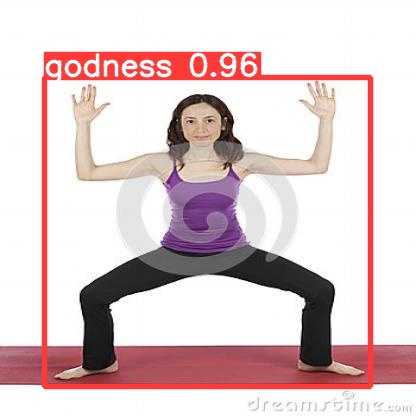

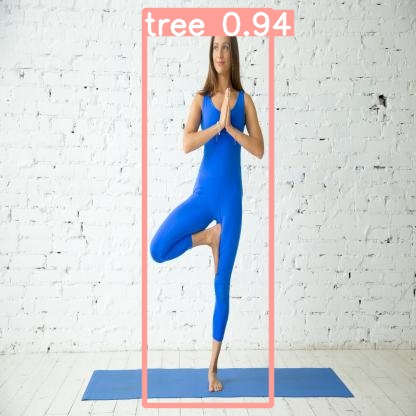

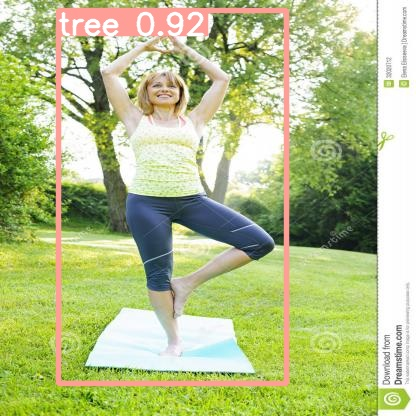

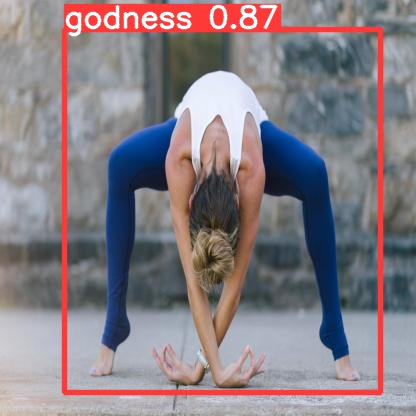

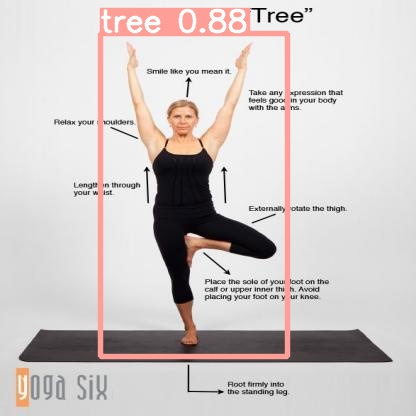

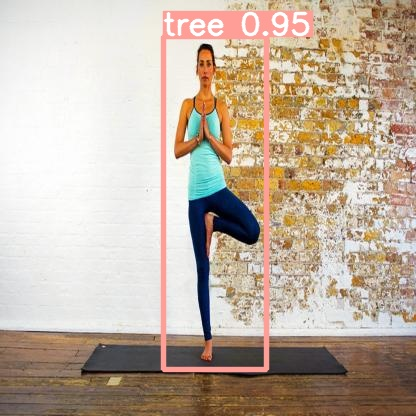

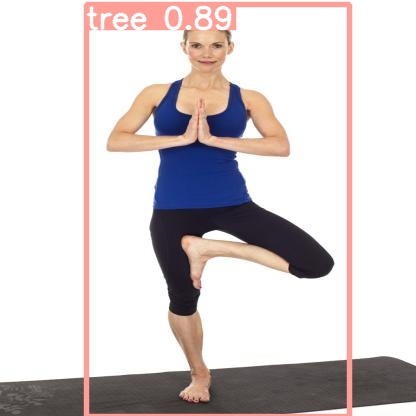

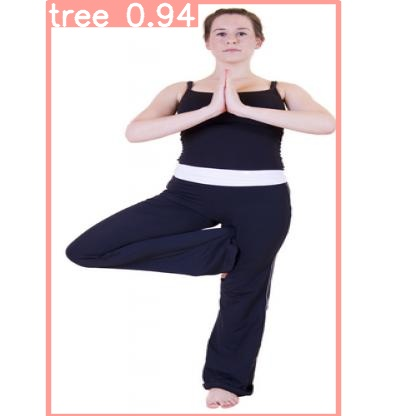

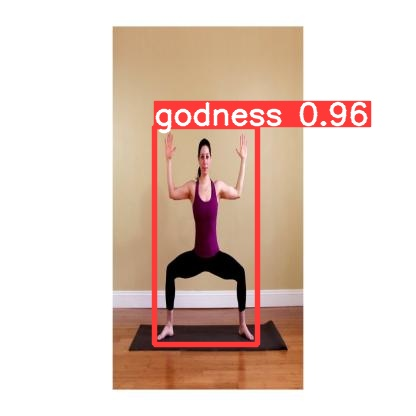

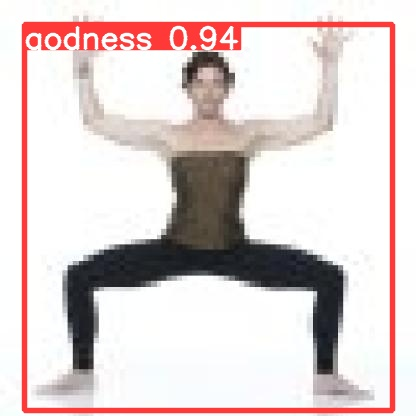

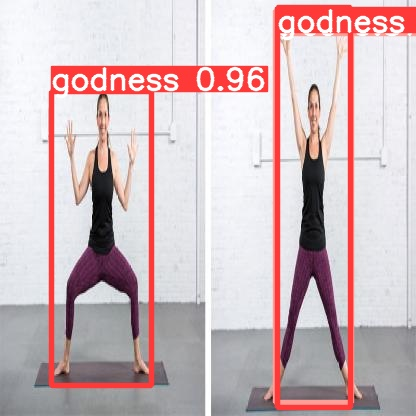

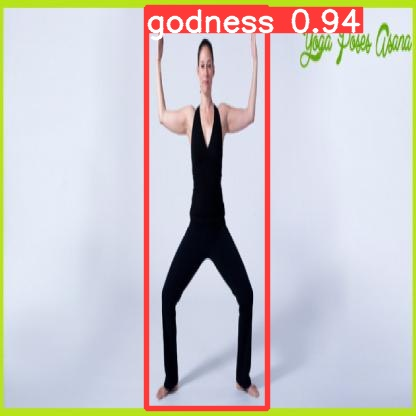

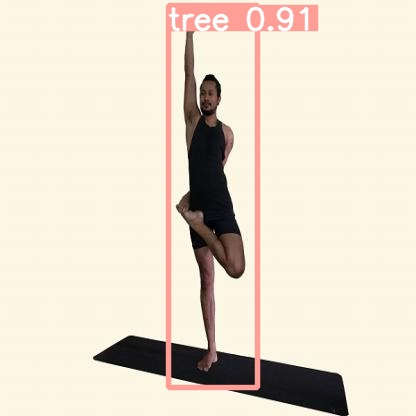

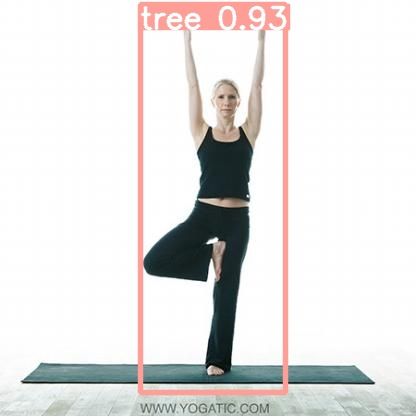

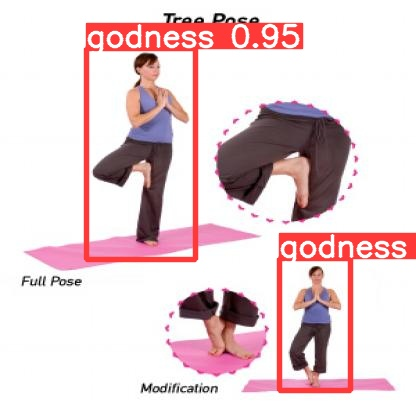

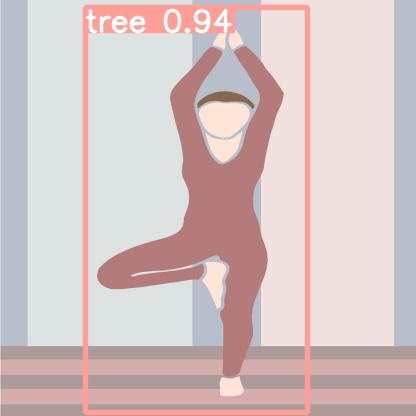

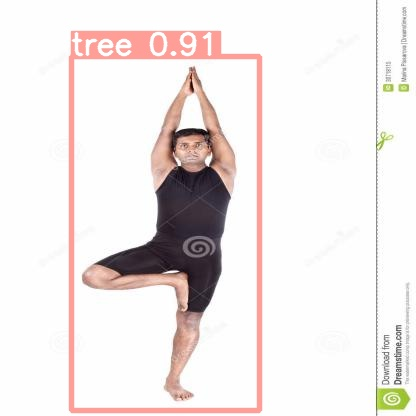

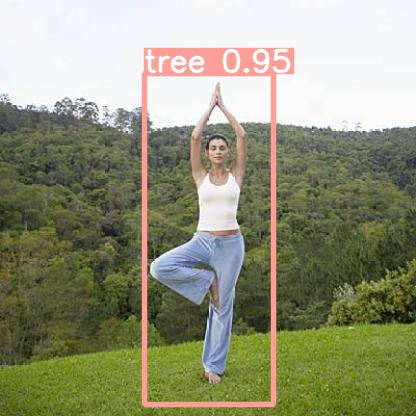

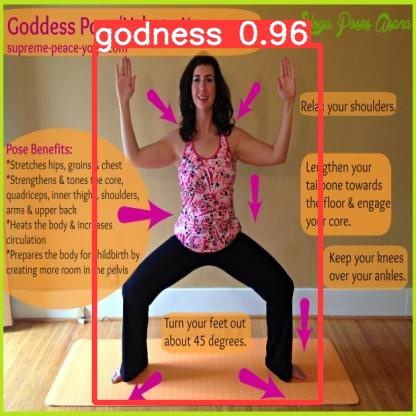

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

## Step 5: Export model's weights for future use

In [ ]:
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/datasets.zip /content/datasets